In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
df = pd.read_csv("./data/penguins_size.csv")
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<AxesSubplot:xlabel='species', ylabel='count'>

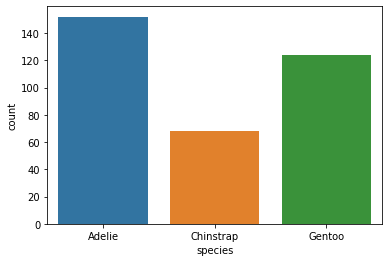

In [3]:
sns.countplot(x=df['species'])

<AxesSubplot:xlabel='species', ylabel='count'>

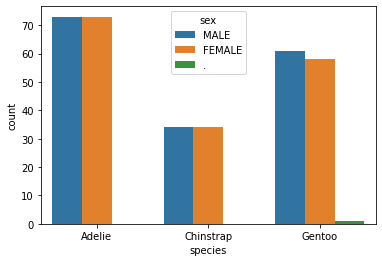

In [3]:
sns.countplot(x=df['species'],hue=df['sex'])

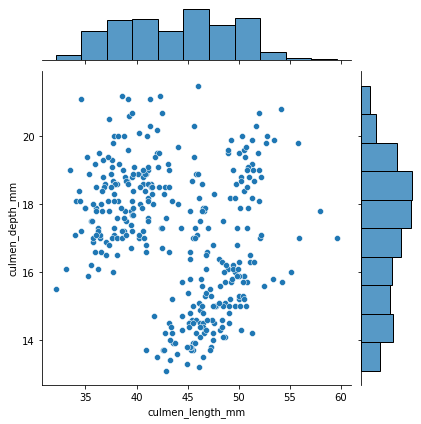

In [4]:
sns.jointplot(x='culmen_length_mm', y='culmen_depth_mm',data=df)

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

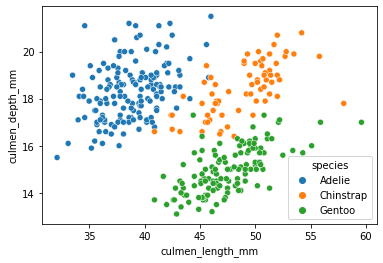

In [5]:
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm',data=df,hue='species')


In [13]:
df["sex"] = df['sex'].fillna(df['sex'].mode()[0])

In [14]:
df=pd.get_dummies(df,columns=['sex','island'],drop_first=True)

In [18]:
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Dream,island_Torgersen
0,Adelie,39.10000,18.70000,181.000000,3750.0,0,1,0,1
1,Adelie,39.50000,17.40000,186.000000,3800.0,1,0,0,1
2,Adelie,40.30000,18.00000,195.000000,3250.0,1,0,0,1
3,Adelie,43.92193,17.15117,200.915205,NaN,0,1,0,1
4,Adelie,36.70000,19.30000,193.000000,3450.0,1,0,0,1


<AxesSubplot:>

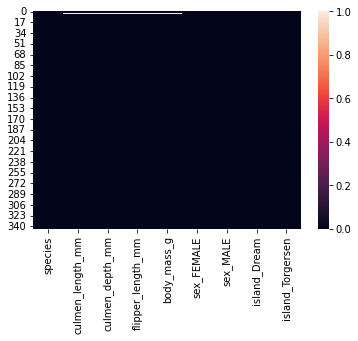

In [10]:
sns.heatmap(df.isnull())

In [16]:
df.iloc[:,1:5] = df.iloc[:,1:5].fillna(df.iloc[:,1:5].mean())

<AxesSubplot:>

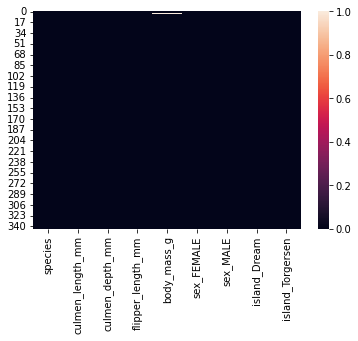

In [17]:
sns.heatmap(df.isnull())

In [11]:
scale=StandardScaler()
scale.fit(df.drop(['species'],axis=1))
transformed=scale.transform(df.drop(['species'],axis=1))
df_scaled=pd.DataFrame(transformed,columns=df.columns[1:])

In [12]:
df_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Dream,island_Torgersen
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,-0.960098,1.023533,-0.750757,2.36968
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,1.041561,-0.977008,-0.750757,2.36968
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,1.041561,-0.977008,-0.750757,2.36968
3,-1.307172e-15,1.806927e-15,0.000000,0.000000,-0.960098,-0.977008,-0.750757,2.36968
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,1.041561,-0.977008,-0.750757,2.36968


In [23]:
X=df_scaled
y=df['species']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [32]:
df.iloc[[1]]

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Dream,island_Torgersen
1,Adelie,39.5,17.4,186.0,3800.0,1,0,0,1


In [25]:
knn=KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)
out1=knn.predict(x_test)

In [26]:
print(classification_report(y_test,out1))
print(confusion_matrix(y_test,out1))

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        39
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.98        86
weighted avg       0.99      0.99      0.99        86

[[38  1  0]
 [ 0 13  0]
 [ 0  0 34]]


In [74]:
x_test

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Dream,island_Torgersen
56,39.0,17.5,186.0,3550.0,1,0,0,0
28,37.9,18.6,172.0,3150.0,1,0,0,0
7,39.2,19.6,195.0,4675.0,0,1,0,1
277,45.5,15.0,220.0,5000.0,0,1,0,0
288,43.5,14.2,220.0,4700.0,1,0,0,0
...,...,...,...,...,...,...,...,...
36,38.8,20.0,190.0,3950.0,0,1,1,0
241,45.1,14.5,215.0,5000.0,1,0,0,0
123,41.4,18.5,202.0,3875.0,0,1,0,1
104,37.9,18.6,193.0,2925.0,1,0,0,0


<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

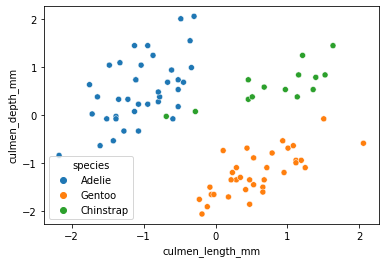

In [27]:
predicted = x_test
predicted["species"] = out1

sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm',data=predicted, hue='species')


<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

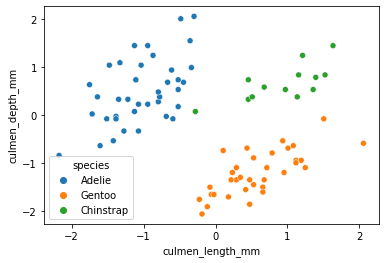

In [28]:
actual = x_test
actual["species"] = y_test

sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm',data=actual, hue='species')


In [29]:
def prediction(penguin):
    scaled_penguin = scale.transform(
        pd.DataFrame([penguin], columns=df.columns[1:]))
    transformed_penguin = pd.DataFrame(scaled_penguin, columns=df.columns[1:])
    species = knn.predict(transformed_penguin)
    return species[0]

In [30]:
print(prediction([46.3, 15.8, 215, 5050, 0, 1, 0, 0]))

Gentoo
